### Dune Sales Analysis

Dune is a reputable global retailer offering a diverse selection of products, including accessories, clothing, and phones. With a growing presence in 14 countries and a team of over 70,000 employees, the company prides itself on providing affordable options for everyone. From fashion-forward trendsetters to muilti-generational families, Dune strives to offer great quality essentials and standout styles that cater to wide range of customers

As a newly appointed Data Analyst, your first task is to analyzing the company's sales data from the previous year and provide insights and recommendations. This analysis will help identify areas of opportunity and inform future business decisions aimed at improving performance and increasing profitability.

#### Exploratory Data Analysis

The Exploratory Data Analysis will be used to analysis, summaries in oder to gain insights and understanding the underlying patterns and relationship:

The EDA process will include the following steps:

- Data Cleaning which involves removing or correcting errors or inconsistencies in the data and alslo transfprming the data. 
- Data Visualization techiques will be used to graphically represent the data and identify trends or patterns
- Statistical Analysis such as mean and standard deviation will be used to identify any relationships between variables and to test hypothesis about the data

#### Tools/Techniques
- Pandas
- Numpy
- Seaborn
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [5]:
#import libraries
import pandas as pd # data visualization
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
import missingno as msno #missing data - data visualization
from collections import Counter #counting

In [6]:
# load the dataset
df = pd.read_csv(r"C:\Users\value\Documents\10alytics projects\python\Dune Sales Data - Dune Sales Data.csv")

In [7]:
#print the top 5 rows

df.head()

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0  19-Feb-16     High        Segun            29               F  Abia   
1  20-Feb-16     High        Segun            29               F  Abia   
2  27-Feb-16     High        Segun            29               F  Abia   
3  12-Mar-16     High        Segun            29               F  Abia   
4  12-Mar-16     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0      80.00   
1         Clothing  Polo shirts         Online       2.0      24.50   
2      Accessories     Keyboard         Online       3.0       3.67   
3      Accessories     Keyboard         Online       2.0      87.50   
4      Accessories     Keyboard         Online       3.0      35.00   

   Unit_Price  
0      109.00  
1       28.50  
2        5.00  
3      116.50  
4       41.67

In [8]:
#print the bottom 5 rows

df.tail()

Date Customer Sales Person  Customer_Age Customer_Gender   State  \
34862   7-Feb-16     High        Kenny            38               M  Ebonyi   
34863  13-Mar-15     High        Kenny            38               M  Ebonyi   
34864   5-Apr-15     High        Kenny            38               M  Ebonyi   
34865  30-Aug-15     High        Kenny            38               M  Ebonyi   
34866        NaN      NaN          NaN            38             NaN     NaN   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
34862           Phones       IPhone         Online       2.0     1160.0   
34863           Phones       IPhone         Online       1.0     2049.0   
34864           Phones       IPhone         Online       3.0      683.0   
34865           Phones       IPhone         Online       1.0     2320.0   
34866              NaN          NaN            NaN       NaN        NaN   

       Unit_Price  
34862      985.50  
34863     1583.00  
34864      560.67  
34865     1568.00  
34866         NaN

In [9]:
# dimensionality of the dat - The number of rows and columns
df.shape

(34867, 12)

In [10]:
# examine the features of the column
df.columns


Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [11]:
# investisigate the dataset for annomalies and datatypes
# colums can be regarded as features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [12]:
# Numerical Statistical Analysis
df.describe().round(1)

Customer_Age  Quantity  Unit_Cost  Unit_Price
count       34867.0   34866.0    34866.0     34866.0
mean           36.4       2.0      349.9       389.2
std            11.1       0.8      490.0       525.3
min            17.0       1.0        0.7         0.7
25%            28.0       1.0       45.0        53.7
50%            35.0       2.0      150.0       179.0
75%            44.0       3.0      455.0       521.0
max            87.0       3.0     3240.0      5082.0

In [13]:
# categorical Statistical Analysis
df.describe(include=['object','bool'])

Date Customer Sales Person Customer_Gender  State  \
count      34866    34866        34866           34866  34866   
unique       576        4            7               2     36   
top     1-Mar-16      Low       Remota               F  Lagos   
freq         196    13041         6667           17439  10332   

       Product_Category Sub_Category Payment Option  
count             34866        34866          34866  
unique                3           17              3  
top         Accessories     Keyboard           Cash  
freq              22534        11112          15911

#### Dealing with missing data¶

- 1.MCAR(Missing completely at random): These are values that are randomly missing and do no depend on any other values. 
- 2.MAR(Missing at random); Thes are values that are dependent on some additional features.
- 3.MNAR(Missing not at random): There is a reason behind why these values are missing.

There are several methods for imputind missing data, including the measure of Central Tendency, regression imputation, and multiple imputation. Measure of central tendency involves replacing missing values with either the mean, median and mode of the variab;e while regression imputation invovles using othrer variables in the dataset to predict missing values.

In [14]:
# Investigate the missing data
null_vals = df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

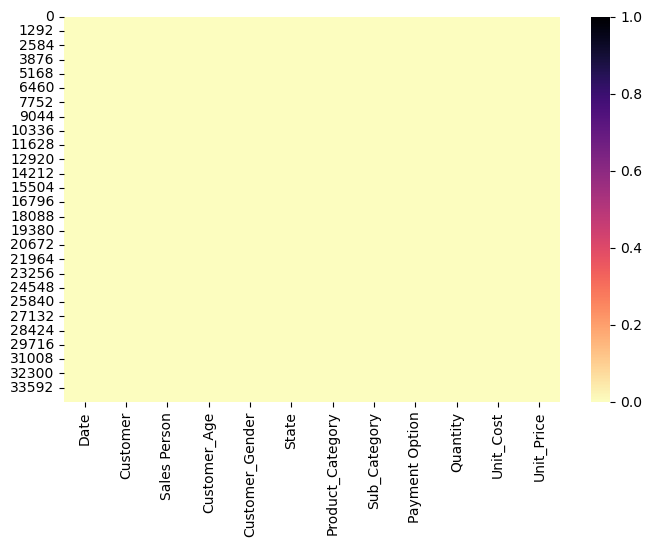

In [15]:
# visualize missing data
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=True, cmap='magma_r');

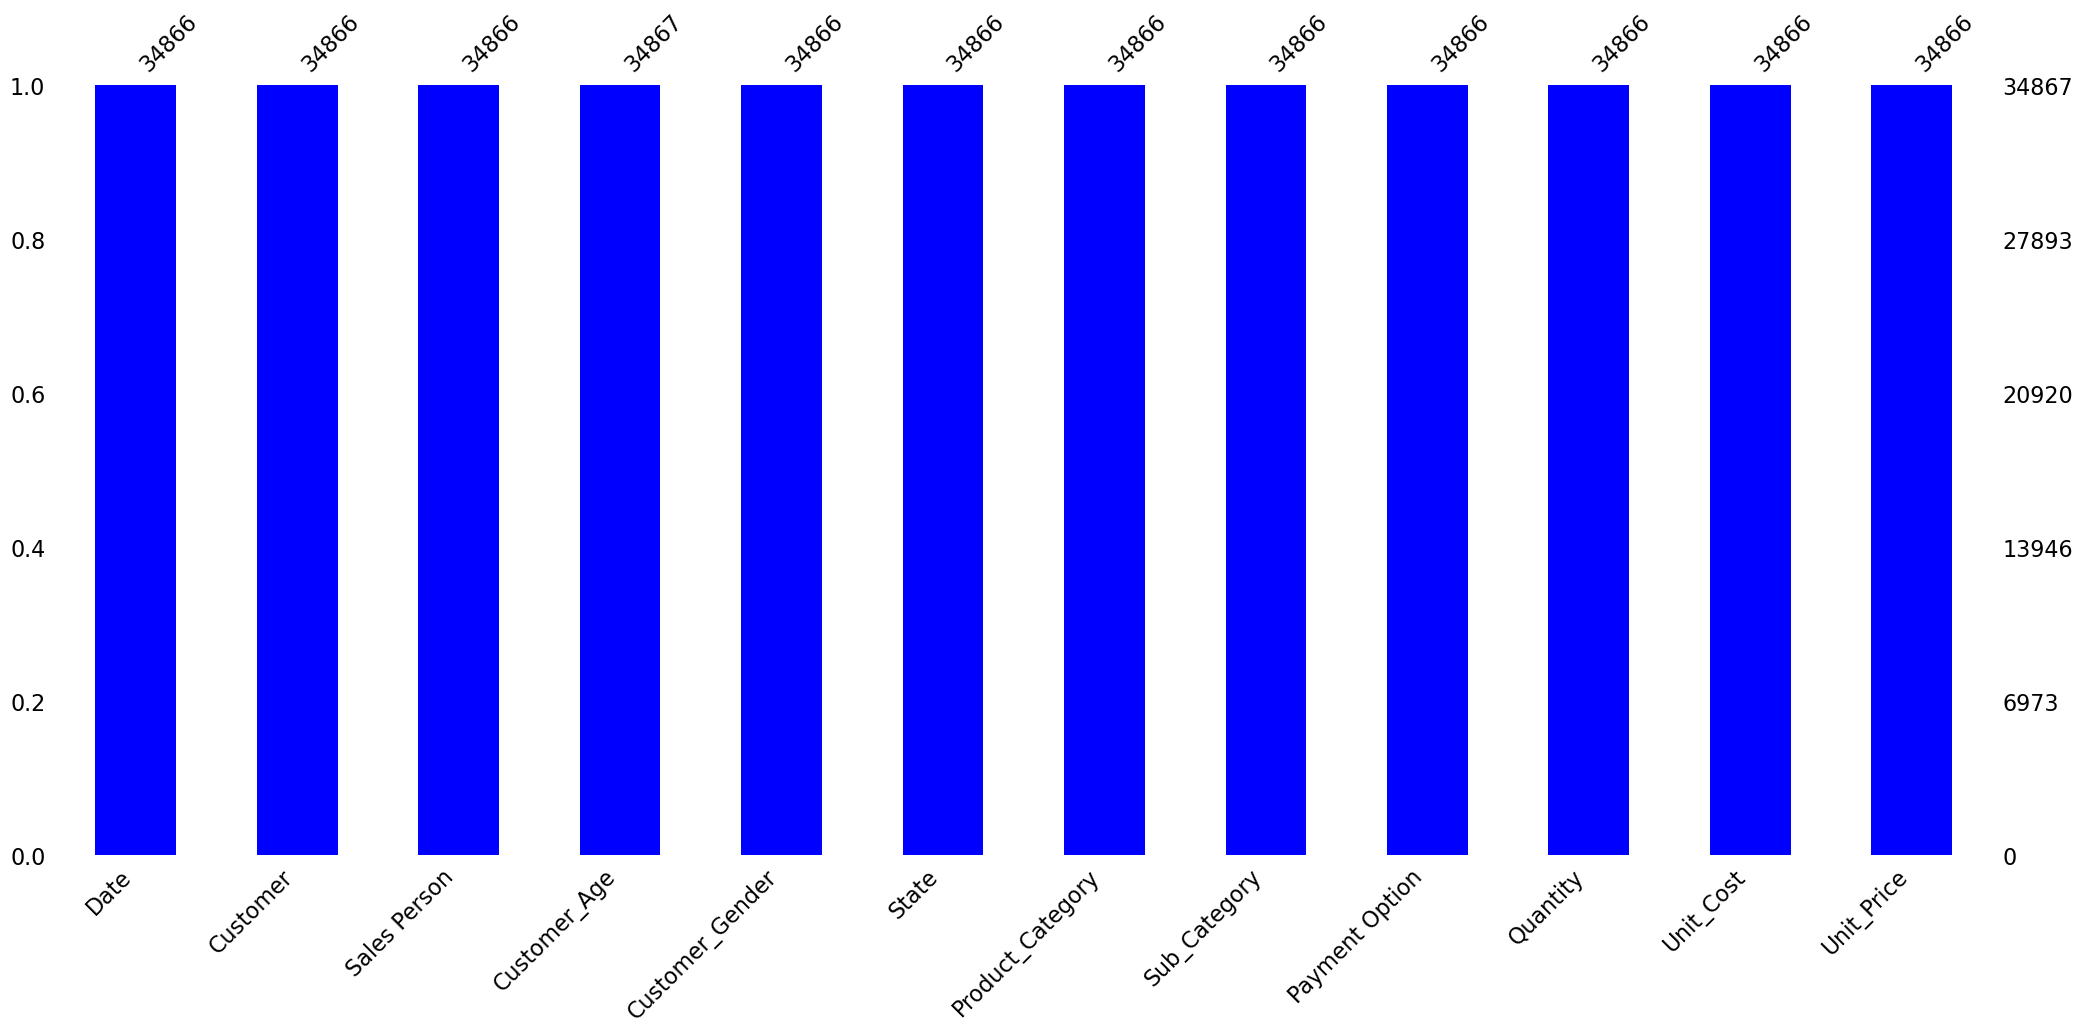

In [16]:
# visualize missing data
msno.bar(df, color='blue');

In [17]:
#display where the missing data
df.isnull()

Date  Customer  Sales Person  Customer_Age  Customer_Gender  State  \
0      False     False         False         False            False  False   
1      False     False         False         False            False  False   
2      False     False         False         False            False  False   
3      False     False         False         False            False  False   
4      False     False         False         False            False  False   
...      ...       ...           ...           ...              ...    ...   
34862  False     False         False         False            False  False   
34863  False     False         False         False            False  False   
34864  False     False         False         False            False  False   
34865  False     False         False         False            False  False   
34866   True      True          True         False             True   True   

       Product_Category  Sub_Category  Payment Option  Quantity  Unit_Cost  \
0                 False         False           False     False      False   
1                 False         False           False     False      False   
2                 False         False           False     False      False   
3                 False         False           False     False      False   
4                 False         False           False     False      False   
...                 ...           ...             ...       ...        ...   
34862             False         False           False     False      False   
34863             False         False           False     False      False   
34864             False         False           False     False      False   
34865             False         False           False     False      False   
34866              True          True            True      True       True   

       Unit_Price  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
34862       False  
34863       False  
34864       False  
34865       False  
34866        True  

[34867 rows x 12 columns]

In [18]:
#display where the missing data
df[df.isnull().any(axis=1)]

Date Customer Sales Person  Customer_Age Customer_Gender State  \
34866  NaN      NaN          NaN            38             NaN   NaN   

      Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
34866              NaN          NaN            NaN       NaN        NaN   

       Unit_Price  
34866         NaN

In [19]:
#remove the missing data
df.dropna(inplace=True)

In [20]:
#confirm the row is removed
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [21]:
#datetime Analysis

df.head(2)

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0  19-Feb-16     High        Segun            29               F  Abia   
1  20-Feb-16     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0       80.0   
1         Clothing  Polo shirts         Online       2.0       24.5   

   Unit_Price  
0       109.0  
1        28.5

In [22]:
# convert the date column into panadas datetime object

df['Date'] =pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


In [23]:
# Extract the year, months and quater
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['month_name'] = df['Date'].dt.month_name()
df['quater'] = df['Date'].dt.quarter

df.head(2)

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0       80.0   
1         Clothing  Polo shirts         Online       2.0       24.5   

   Unit_Price  year  month month_name  quater  
0       109.0  2016      2   February       1  
1        28.5  2016      2   February       1

In [24]:
# customize the customer in group

def age_group(x):
    if x <= 25:
        return '<=25 Young Adult'
    elif x <= 40:
        return '25-40 Adult'
    elif x <= 50:
        return '41-50 Old Adult'
    else:
        return '>=50 Elder'
# Apply function to the data

df['age_group'] = df['Customer_Age'].apply(age_group)
df.head(2)


Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0       80.0   
1         Clothing  Polo shirts         Online       2.0       24.5   

   Unit_Price  year  month month_name  quater    age_group  
0       109.0  2016      2   February       1  25-40 Adult  
1        28.5  2016      2   February       1  25-40 Adult

In [25]:
# calculate cost, revenue and profit 
df['Cost'] =df['Quantity']*df['Unit_Cost']
df['Revenue'] =df['Quantity']*df['Unit_Price']
df['Profit'] =df['Revenue']-df['Cost']

df.head()

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   
2 2016-02-27     High        Segun            29               F  Abia   
3 2016-03-12     High        Segun            29               F  Abia   
4 2016-03-12     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  Unit_Cost  \
0      Accessories     Keyboard         Online       1.0      80.00   
1         Clothing  Polo shirts         Online       2.0      24.50   
2      Accessories     Keyboard         Online       3.0       3.67   
3      Accessories     Keyboard         Online       2.0      87.50   
4      Accessories     Keyboard         Online       3.0      35.00   

   Unit_Price  year  month month_name  quater    age_group    Cost  Revenue  \
0      109.00  2016      2   February       1  25-40 Adult   80.00   109.00   
1       28.50  2016      2   February       1  25-40 Adult   49.00    57.00   
2        5.00  2016      2   February       1  25-40 Adult   11.01    15.00   
3      116.50  2016      3      March       1  25-40 Adult  175.00   233.00   
4       41.67  2016      3      March       1  25-40 Adult  105.00   125.01   

   Profit  
0   29.00  
1    8.00  
2    3.99  
3   58.00  
4   20.01

In [26]:
# profit or loss grouping

def porl(x):
    if x >= 0:
        return 'Profit'
    else:
        return 'Loss'
df['Profit_Label'] = df['Profit'].apply(porl)
df.head(2)
     

Date Customer Sales Person  Customer_Age Customer_Gender State  \
0 2016-02-19     High        Segun            29               F  Abia   
1 2016-02-20     High        Segun            29               F  Abia   

  Product_Category Sub_Category Payment Option  Quantity  ...  Unit_Price  \
0      Accessories     Keyboard         Online       1.0  ...       109.0   
1         Clothing  Polo shirts         Online       2.0  ...        28.5   

   year  month  month_name quater    age_group  Cost  Revenue  Profit  \
0  2016      2    February      1  25-40 Adult  80.0    109.0    29.0   
1  2016      2    February      1  25-40 Adult  49.0     57.0     8.0   

   Profit_Label  
0        Profit  
1        Profit  

[2 rows x 21 columns]

### Univariate Analysis

Univariate Analysis involves analyzing the distribution and summary statistics of individual variable/column/feature.

- Numerical Column/Features = Numerical Visualization Techniques
- Categorical Column/Features = Categorical Visualizayion Techniques

#### Categorical Visualization Techniques

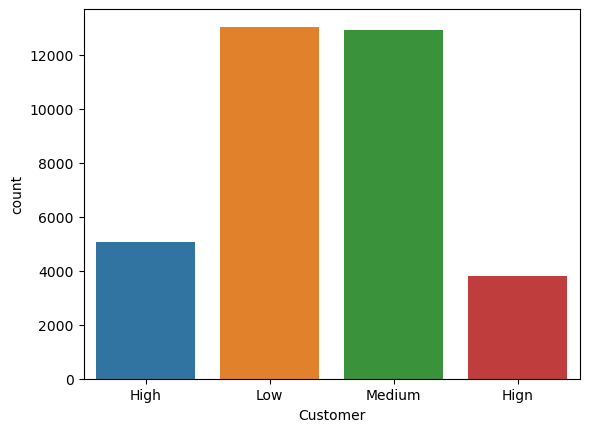

In [27]:
# how customer beloong to each customer spec
sns.countplot(x='Customer', data=df);

In [28]:
#investigate the columns affected
df[df['Customer'] == 'Hign'].head(3)

Date Customer Sales Person  Customer_Age Customer_Gender  State  \
29770 2015-08-03     Hign       Derick            28               F  Lagos   
29771 2015-08-04     Hign       Derick            28               F  Lagos   
29772 2015-08-04     Hign       Derick            28               F  Lagos   

      Product_Category Sub_Category Payment Option  Quantity  ...  Unit_Price  \
29770           Phones       IPhone           Cash       1.0  ...     2136.00   
29771      Accessories     Keyboard           Cash       2.0  ...       19.50   
29772      Accessories     Keyboard           Cash       3.0  ...       18.67   

       year  month  month_name quater    age_group     Cost  Revenue  Profit  \
29770  2015      8      August      3  25-40 Adult  2295.00  2136.00  -159.0   
29771  2015      8      August      3  25-40 Adult    35.00    39.00     4.0   
29772  2015      8      August      3  25-40 Adult    50.01    56.01     6.0   

       Profit_Label  
29770          Loss  
29771        Profit  
29772        Profit  

[3 rows x 21 columns]

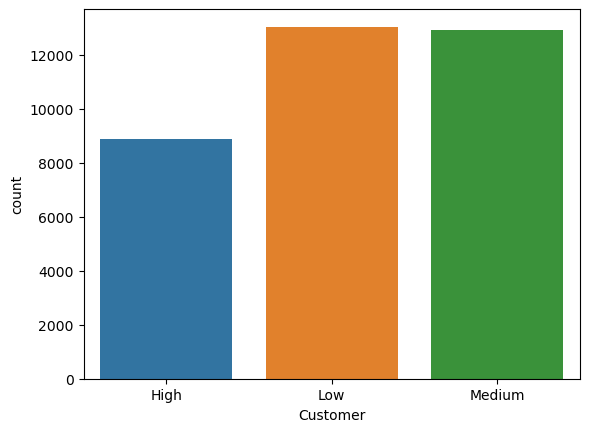

In [29]:
# correct the spelling of hign
df.loc[df['Customer'] == 'Hign','Customer'] = 'High'
sns.countplot(x='Customer', data=df);

In [30]:
df['Customer'].value_counts()

Low       13041
Medium    12926
High       8899
Name: Customer, dtype: int64

#### Observation
The low customers has 13041 with the highest number of transactions follow by 
the Medium customers with 12926 transactions and High customers as the lowest transactions with 8899. 


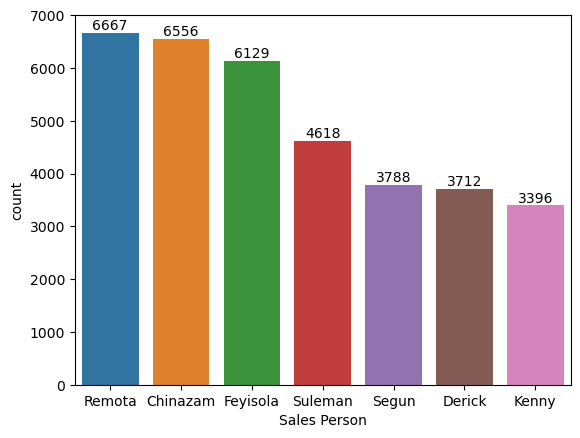

In [31]:
# how many transaction by sales person
ax = sns.countplot(x=df['Sales Person'], 
                  order=df['Sales Person'].value_counts(ascending=False).index)
values = df['Sales Person'].value_counts(ascending=False)
ax.bar_label(container=ax.containers[0], labels=values);

#### Observation

- Remota has the highest with 6667 transactions while the lowest is Kenny with id 3396.
- The salespersons with the transactions above 5000 are Remota, Chinazam and Feyisola.
- The salesperson with transactions below 5000 are Suleman, Segun, Derick and Kenny


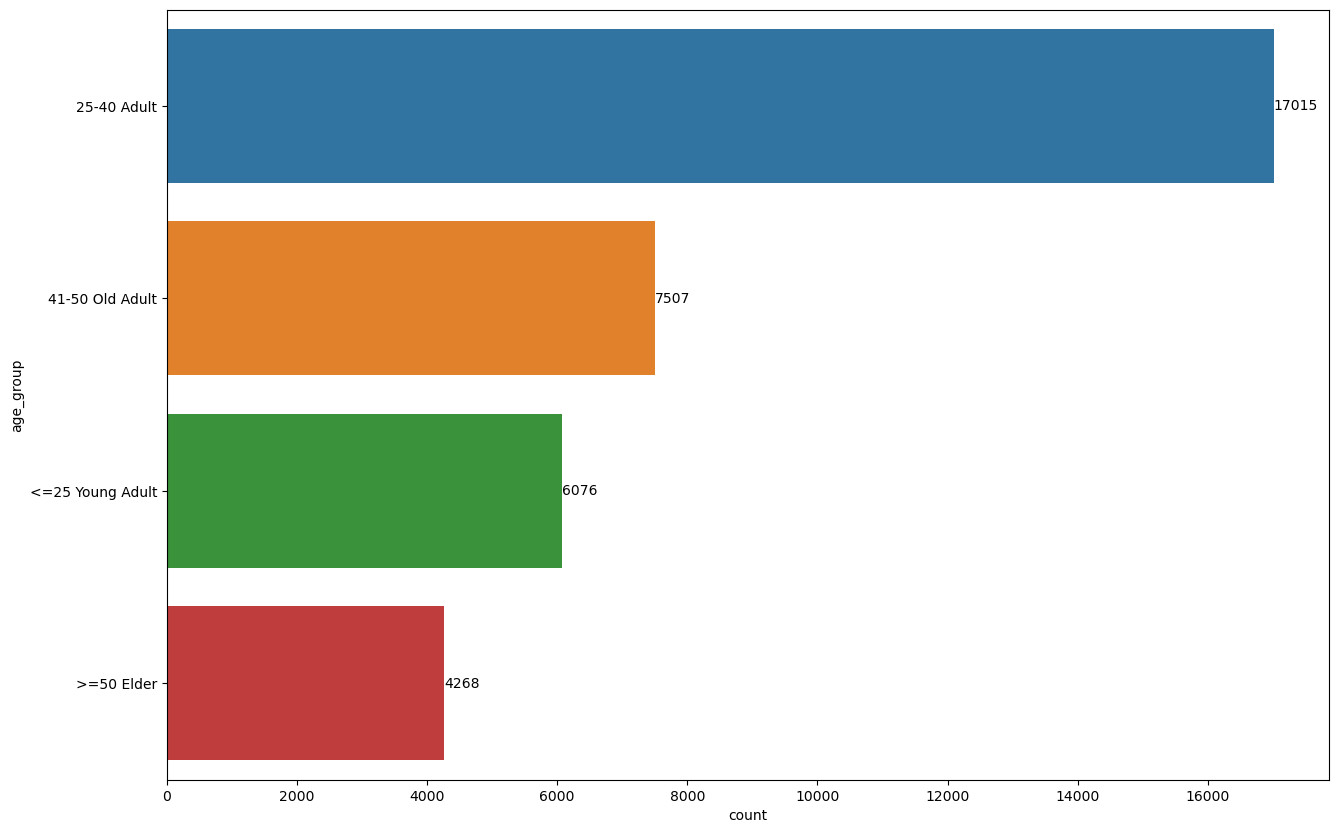

In [32]:
# Total Transaction by customer age group
plt.figure(figsize=(15,10))
ax = sns.countplot(y=df['age_group'], 
                  order=df['age_group'].value_counts(ascending=False).index)
values = df['age_group'].value_counts(ascending=False)
ax.bar_label(container=ax.containers[0], labels=values);

#### Observation
- Adults between the age of 25- 40 made the highest transactions with a large margine of about 10,000 with the rest of the age group while above 50 made the lowest transaction.


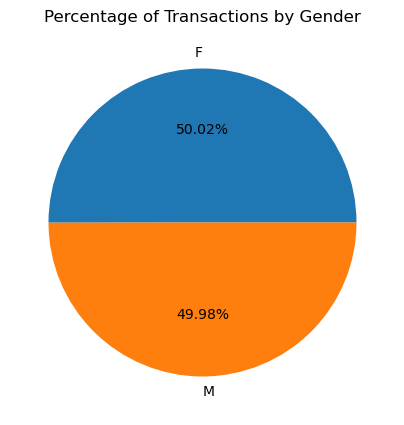

In [33]:
# total Transaction by customer Gender

fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['Customer_Gender'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of Transactions by Gender')
plt.show();

## Observations

Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: State, dtype: int64


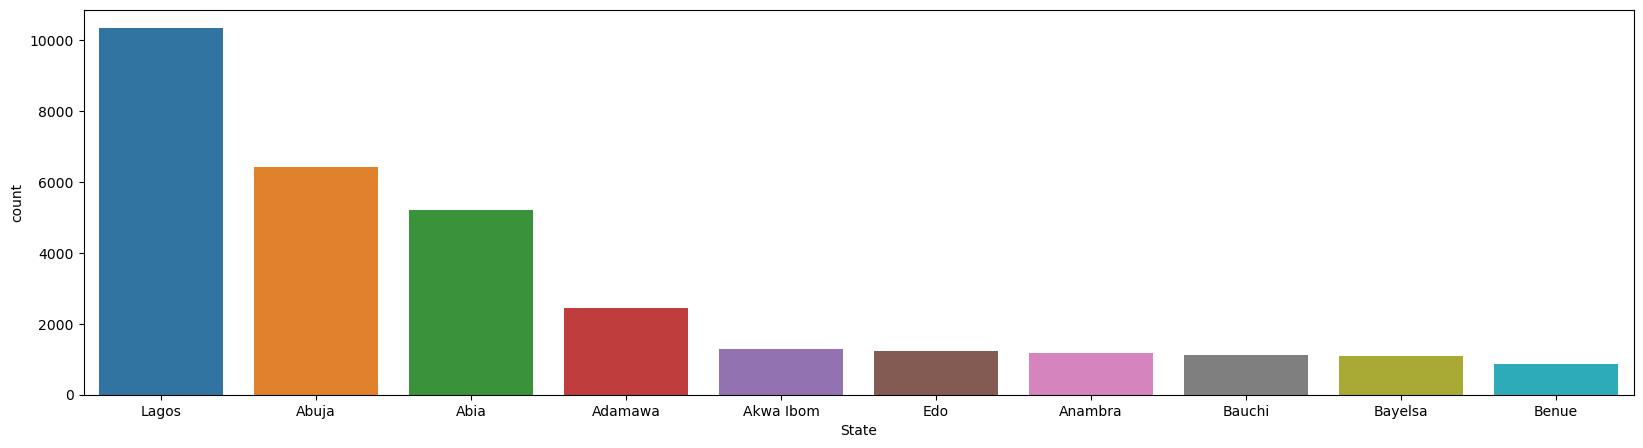

In [34]:
# top 10 Transaction by state
plt.figure(figsize=(20,5))
topten = df['State'].value_counts().head(10)
sns.countplot(x='State', data=df, order=topten.index);
print(topten)

#### Observations
- Lagos had 10332 the highest number of transaction. 

Assignment

- Product Category
- Sub Category
- Payment Option
- Month Name

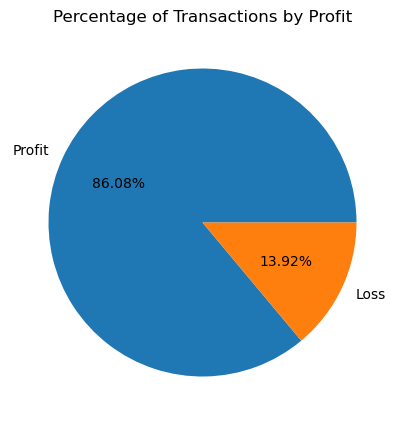

In [49]:
fig,ax = plt.subplots(figsize=(5,5))
count = Counter(df['Profit_Label'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title('Percentage of Transactions by Profit')
plt.show();


#### Observations

- 86.08% transaction are in profits while 13.92% are in loss

In [36]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quater', 'age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

### Numerical Data Visualization

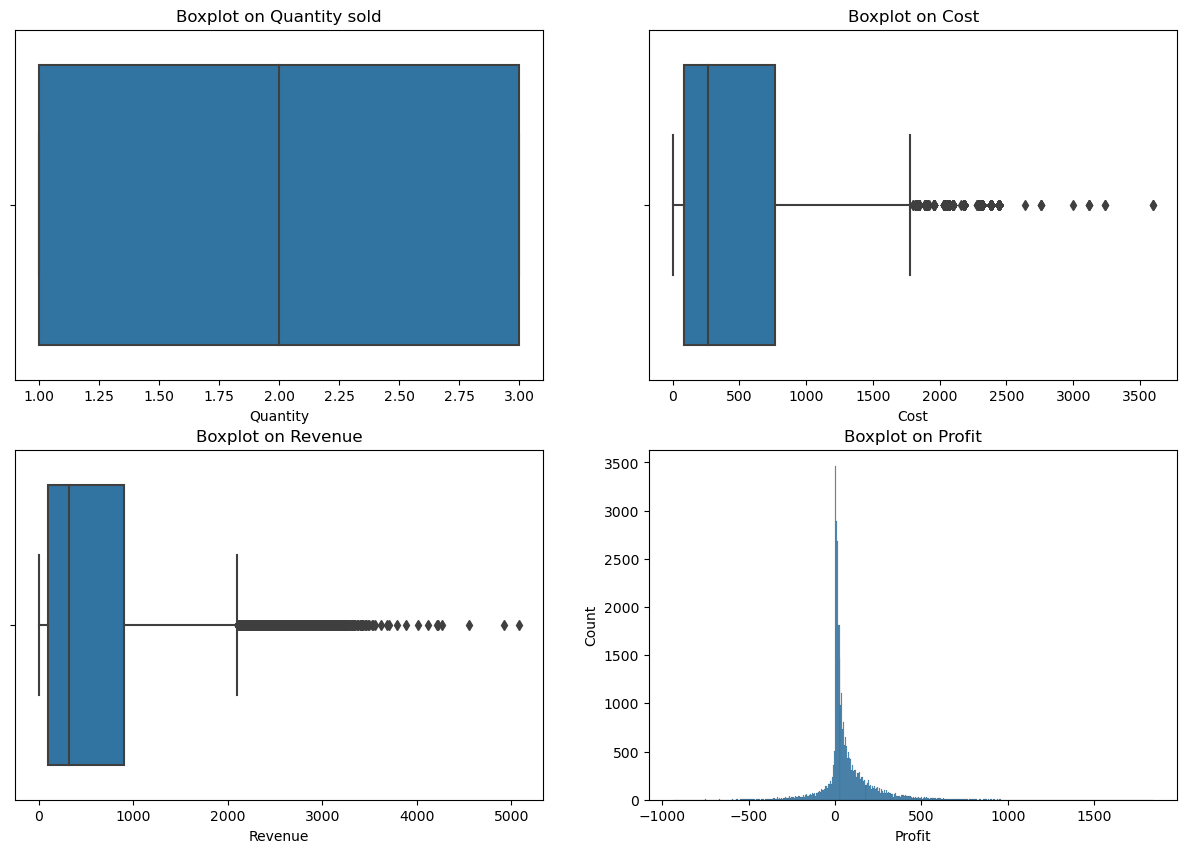

In [37]:
# Quantity, cost, Revenue and Profit -- using subplot

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
sns.boxplot(x='Quantity', data=df, ax=axs[0,0])
axs[0,0].set_title('Boxplot on Quantity sold')

sns.boxplot(x='Cost', data=df, ax=axs[0,1])
axs[0,1].set_title('Boxplot on Cost')

sns.boxplot(x='Revenue', data=df, ax=axs[1,0])
axs[1,0].set_title('Boxplot on Revenue')

sns.histplot(x='Profit', data=df, ax=axs[1,1])
axs[1,1].set_title('Boxplot on Profit');

### Bivariate Analysis
Bivariate analysis involves analyzing the relationship between two variable
- The focus is on profit

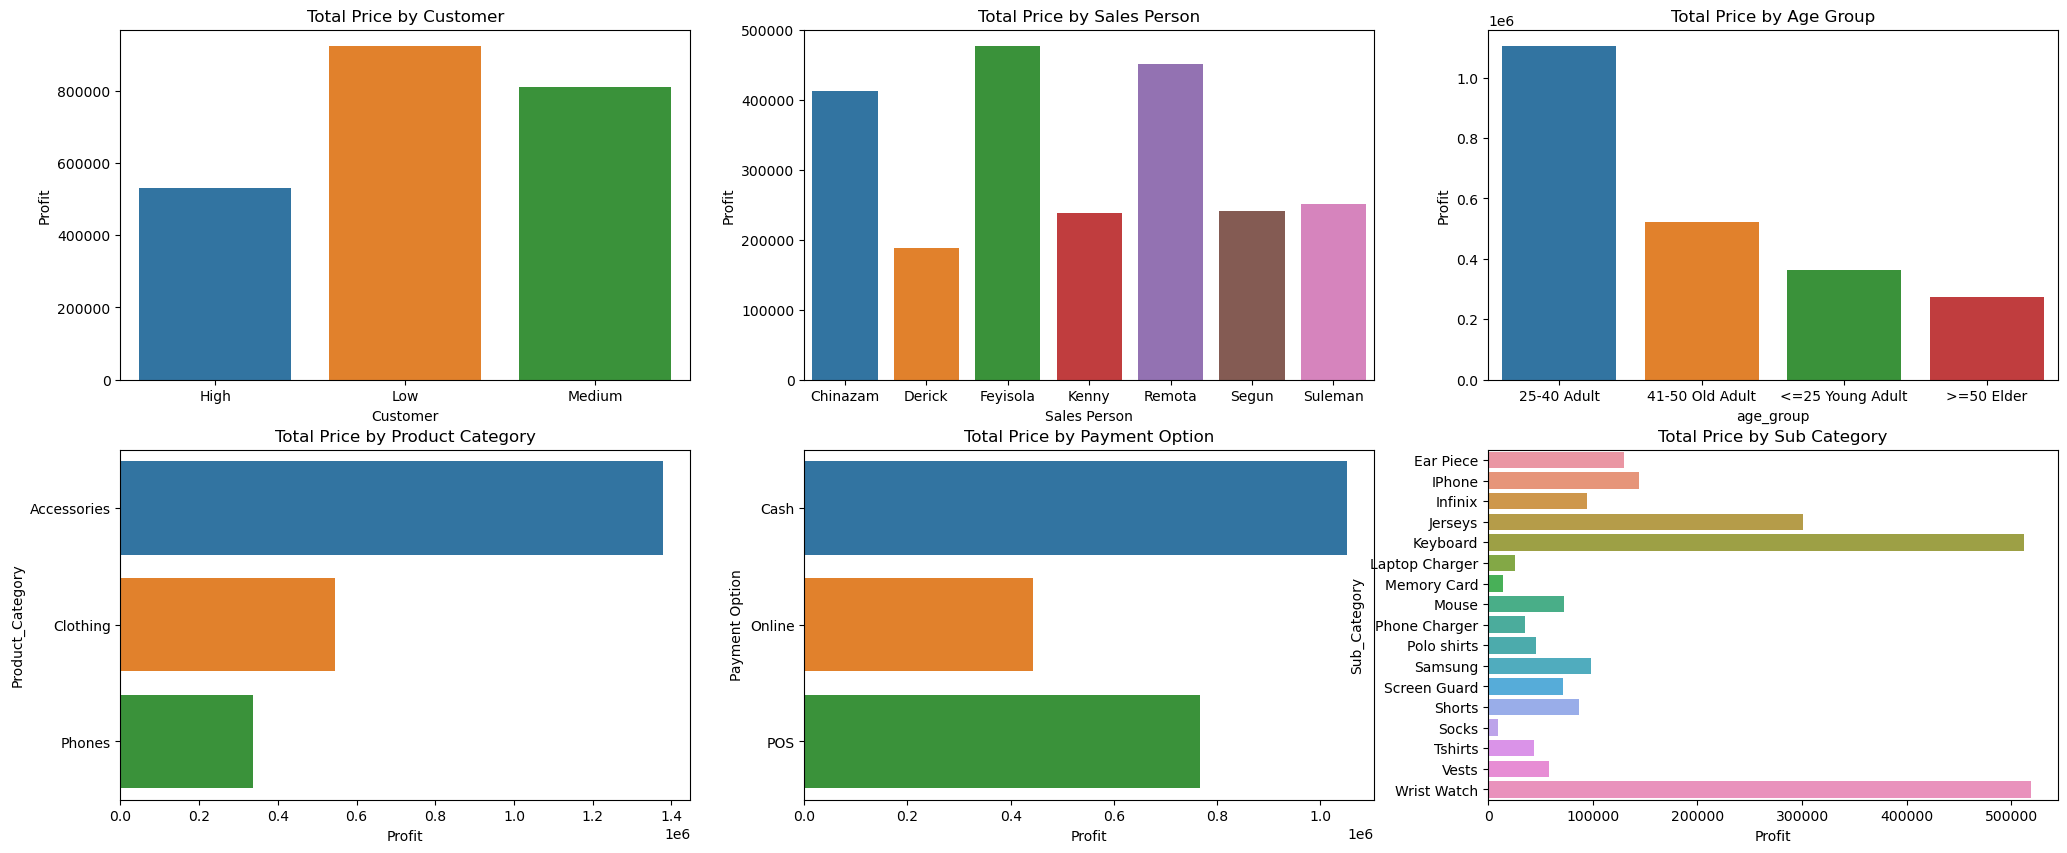

In [38]:
# Categorical

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

cust_prof = df.groupby('Customer')['Profit'].sum().reset_index()
sns.barplot(x='Customer', y='Profit', data=cust_prof, ax=axs[0,0])
axs[0,0].set_title('Total Price by Customer')

sp_prof = df.groupby('Sales Person')['Profit'].sum().reset_index()
sns.barplot(x='Sales Person', y='Profit', data=sp_prof, ax=axs[0,1])
axs[0,1].set_title('Total Price by Sales Person')

ag_prof = df.groupby('age_group')['Profit'].sum().reset_index()
sns.barplot(x='age_group', y='Profit', data=ag_prof, ax=axs[0,2])
axs[0,2].set_title('Total Price by Age Group')

pc_prof = df.groupby('Product_Category')['Profit'].sum().reset_index()
sns.barplot(y='Product_Category', x='Profit', data=pc_prof, ax=axs[1,0])
axs[1,0].set_title('Total Price by Product Category')

pc_prof = df.groupby('Payment Option')['Profit'].sum().reset_index()
sns.barplot(y='Payment Option', x='Profit', data=pc_prof, ax=axs[1,1])
axs[1,1].set_title('Total Price by Payment Option')

sc_prof = df.groupby('Sub_Category')['Profit'].sum().reset_index()
sns.barplot(y='Sub_Category', x='Profit', data=sc_prof, ax=axs[1,2])
axs[1,2].set_title('Total Price by Sub Category');

#### Observations

From the visualization above, the following from each visualization has the highest profit
- Low Customer.
- The salesperson Feyisola.
- The age group is 25-40(Adult).
- Product Categories is Accessories.
- Payment Method is cash.
- Product Suub Category is Wrist watch and keyboard.


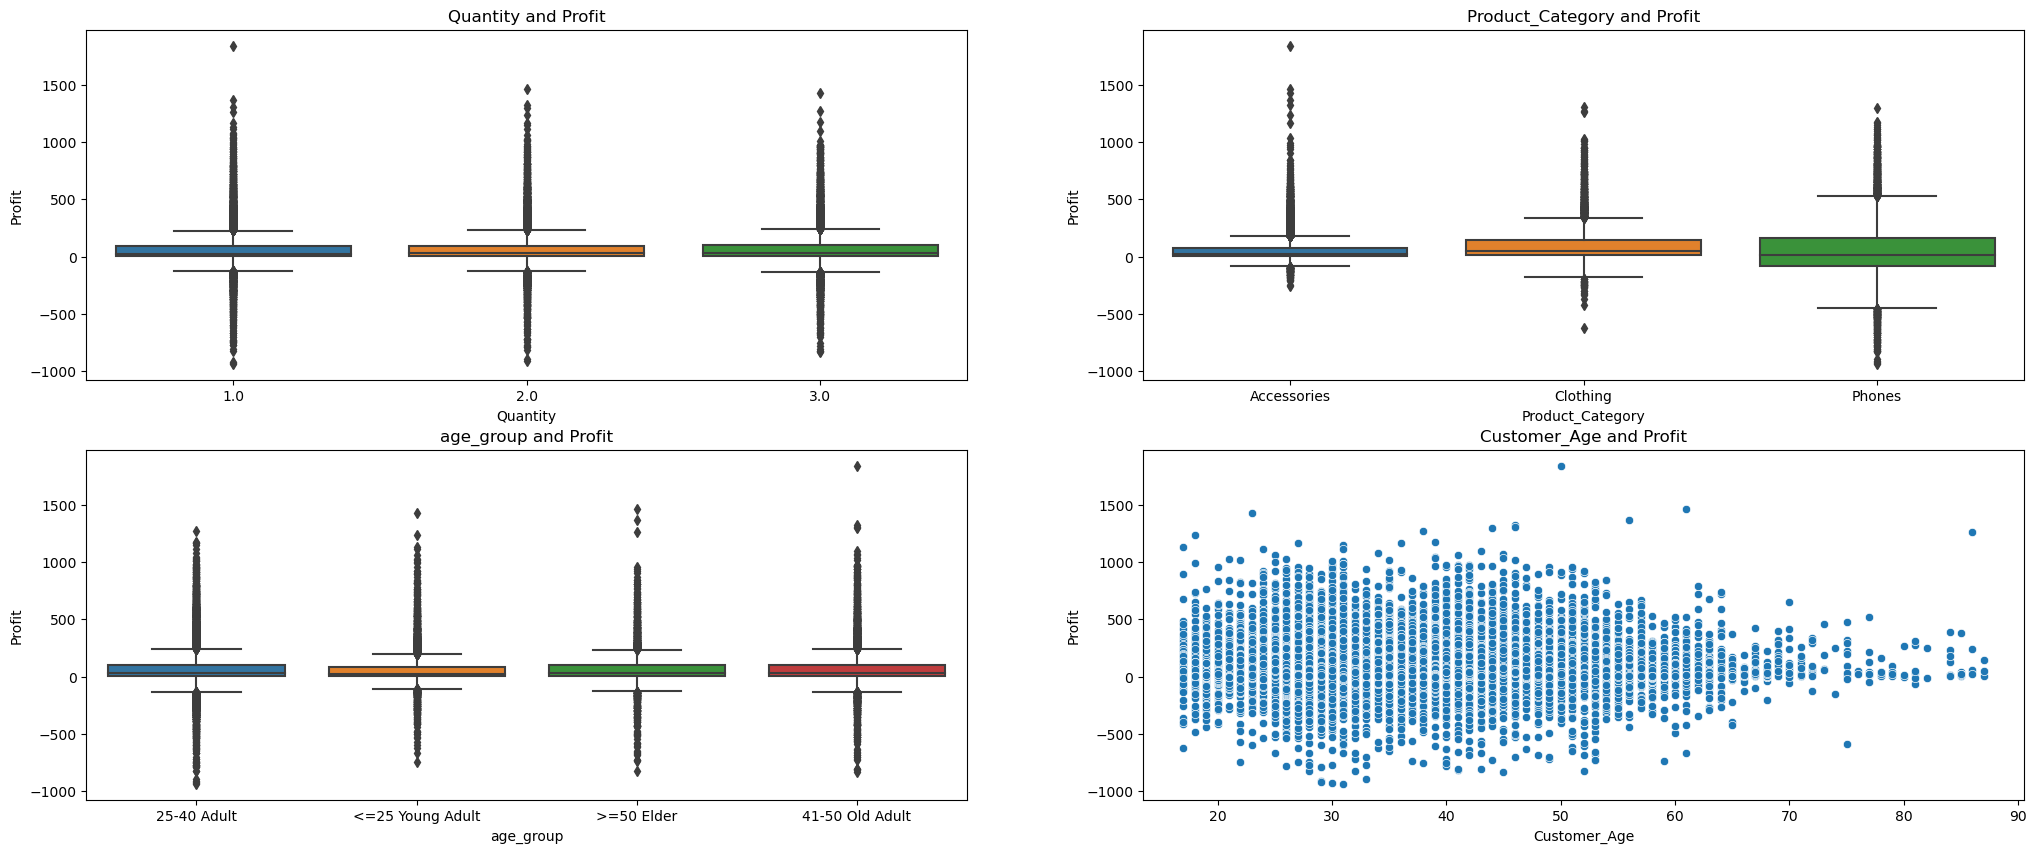

In [39]:
# Numerical Columns

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.boxplot(x='Quantity', y='Profit', data=df, ax=axs[0,0])
axs[0,0].set_title('Quantity and Profit')

sns.boxplot(x='Product_Category', y='Profit', data=df, ax=axs[0,1])
axs[0,1].set_title('Product_Category and Profit')

sns.boxplot(x='age_group', y='Profit', data=df, ax=axs[1,0])
axs[1,0].set_title('age_group and Profit')

sns.scatterplot(x='Customer_Age', y='Profit', data=df, ax=axs[1,1])
axs[1,1].set_title('Customer_Age and Profit');

### Multivariate Analysis

Multivariate analysis involves analyzing the relationship between three or more variable

In [40]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quater', 'age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

In [41]:
# product category against cost revenue and profit

procat = df.groupby('Product_Category')[['Cost','Revenue','Profit']].sum().reset_index()
procat 

Product_Category         Cost      Revenue      Profit
0      Accessories   6041896.06   7420663.12  1378767.06
1         Clothing   2892324.94   3437556.95   545232.01
2           Phones  11148745.02  11486354.63   337609.61

In [42]:
procat = df.groupby('Product_Category')[['Cost','Revenue','Profit']].sum().reset_index()
procat1 = pd.melt(procat, id_vars='Product_Category', var_name='Metric', value_name='Total')
procat1

Product_Category   Metric        Total
0      Accessories     Cost   6041896.06
1         Clothing     Cost   2892324.94
2           Phones     Cost  11148745.02
3      Accessories  Revenue   7420663.12
4         Clothing  Revenue   3437556.95
5           Phones  Revenue  11486354.63
6      Accessories   Profit   1378767.06
7         Clothing   Profit    545232.01
8           Phones   Profit    337609.61

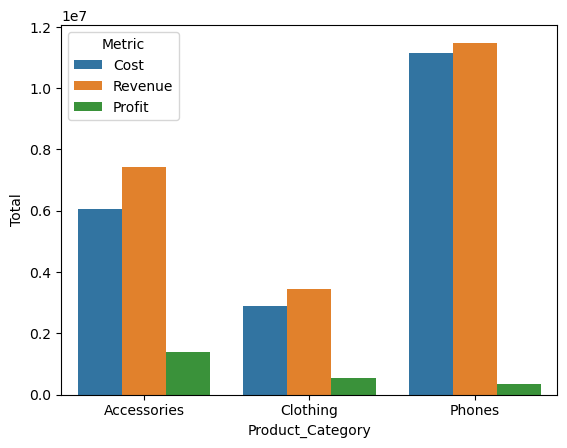

In [43]:
procat = df.groupby('Product_Category')[['Cost','Revenue','Profit']].sum().reset_index()
procat = pd.melt(procat, id_vars='Product_Category', var_name='Metric', value_name='Total')
sns.barplot(data=procat, x='Product_Category', y='Total', hue='Metric');

#### Observation

- Phones made the highest cost and revenue it was also the lowest profit and Accessories made the highest profit

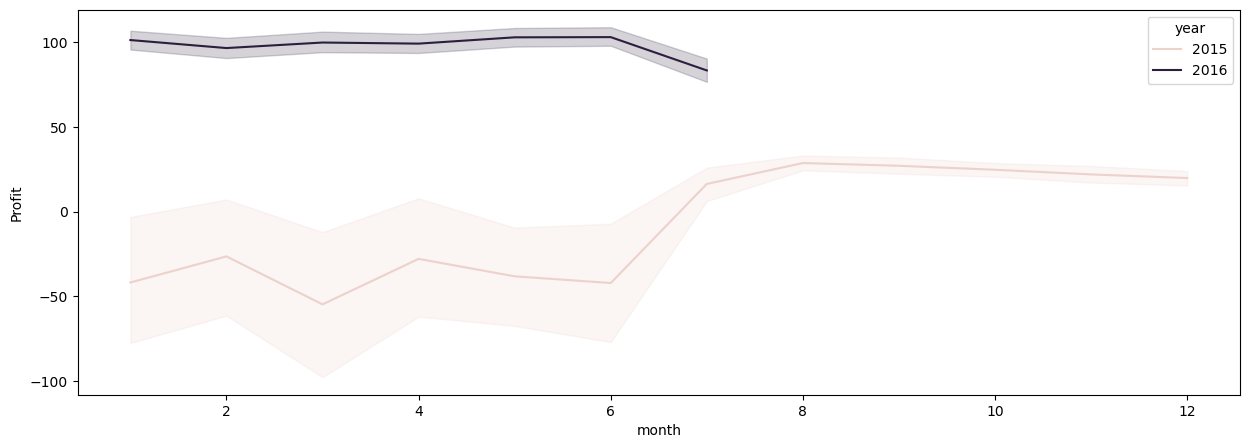

In [44]:
plt.figure(figsize=(15,5))
sns.lineplot(x='month', y='Profit', data=df, hue='year');

In [45]:
# using Pivot table

df.pivot_table(values='Profit', index='year', columns='month', aggfunc='sum')

month         1          2          3          4          5          6   \
year                                                                      
2015    -5778.70   -4079.65   -8163.79   -4945.69   -7801.45   -8690.61   
2016   280204.25  263640.18  299777.67  307746.51  356915.59  357549.86   

month         7         8         9         10       11        12  
year                                                               
2015    15104.47  65926.24  62172.33  62950.66  54480.9  67448.12  
2016   107151.79       NaN       NaN       NaN      NaN       NaN

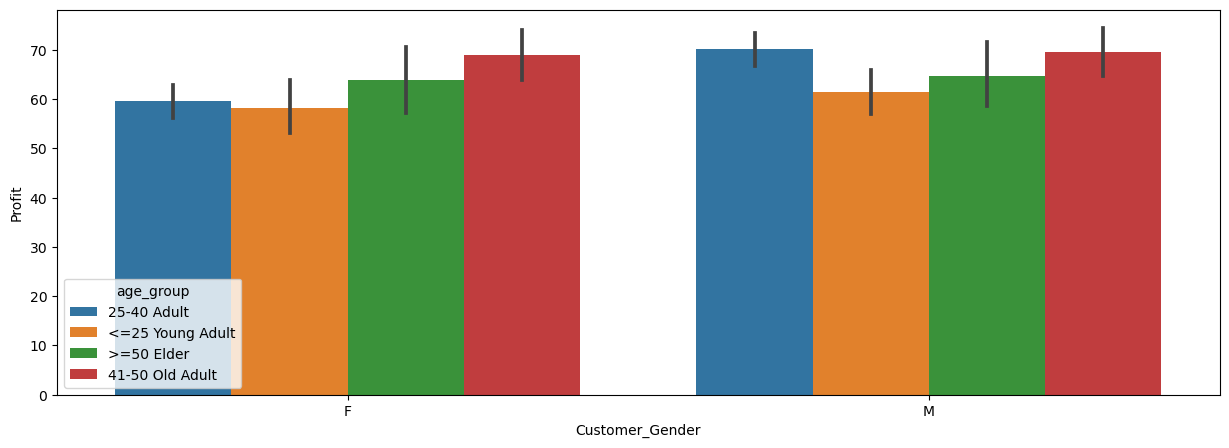

In [46]:
# customer gender, age group and profit
plt.figure(figsize=(15,5))
sns.barplot(x='Customer_Gender', y='Profit', data=df, hue='age_group');

#### Observation

Female at the age of 41 - 50 made the highest profit while Male at agt 25 - 40 made the highest profit 

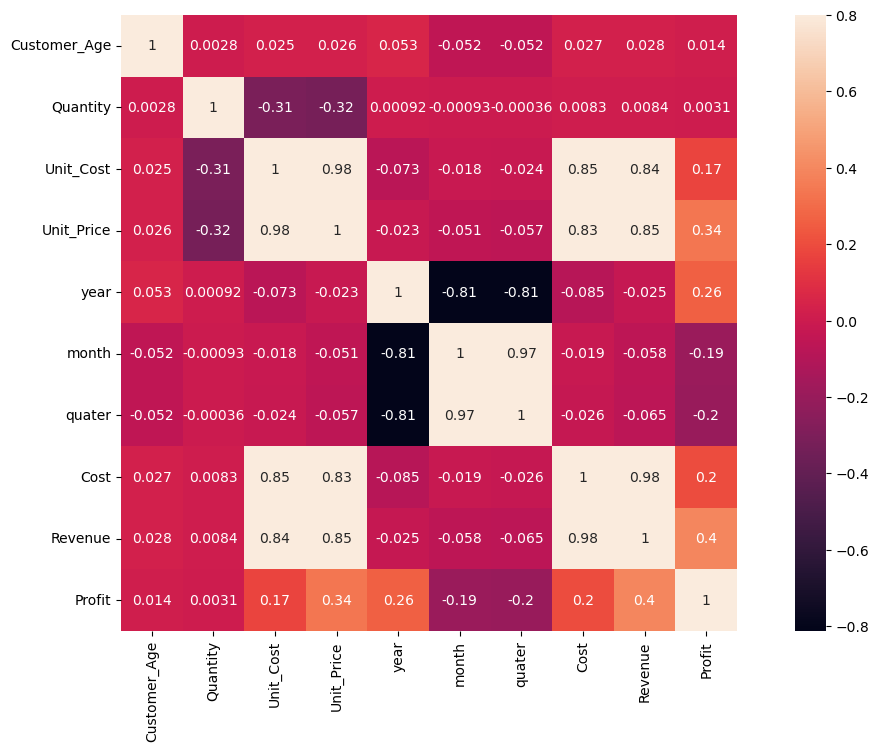

In [47]:
#correlation

a= df.corr()
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(a, vmax=.8, square=True, annot=True);


C:\Users\value\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


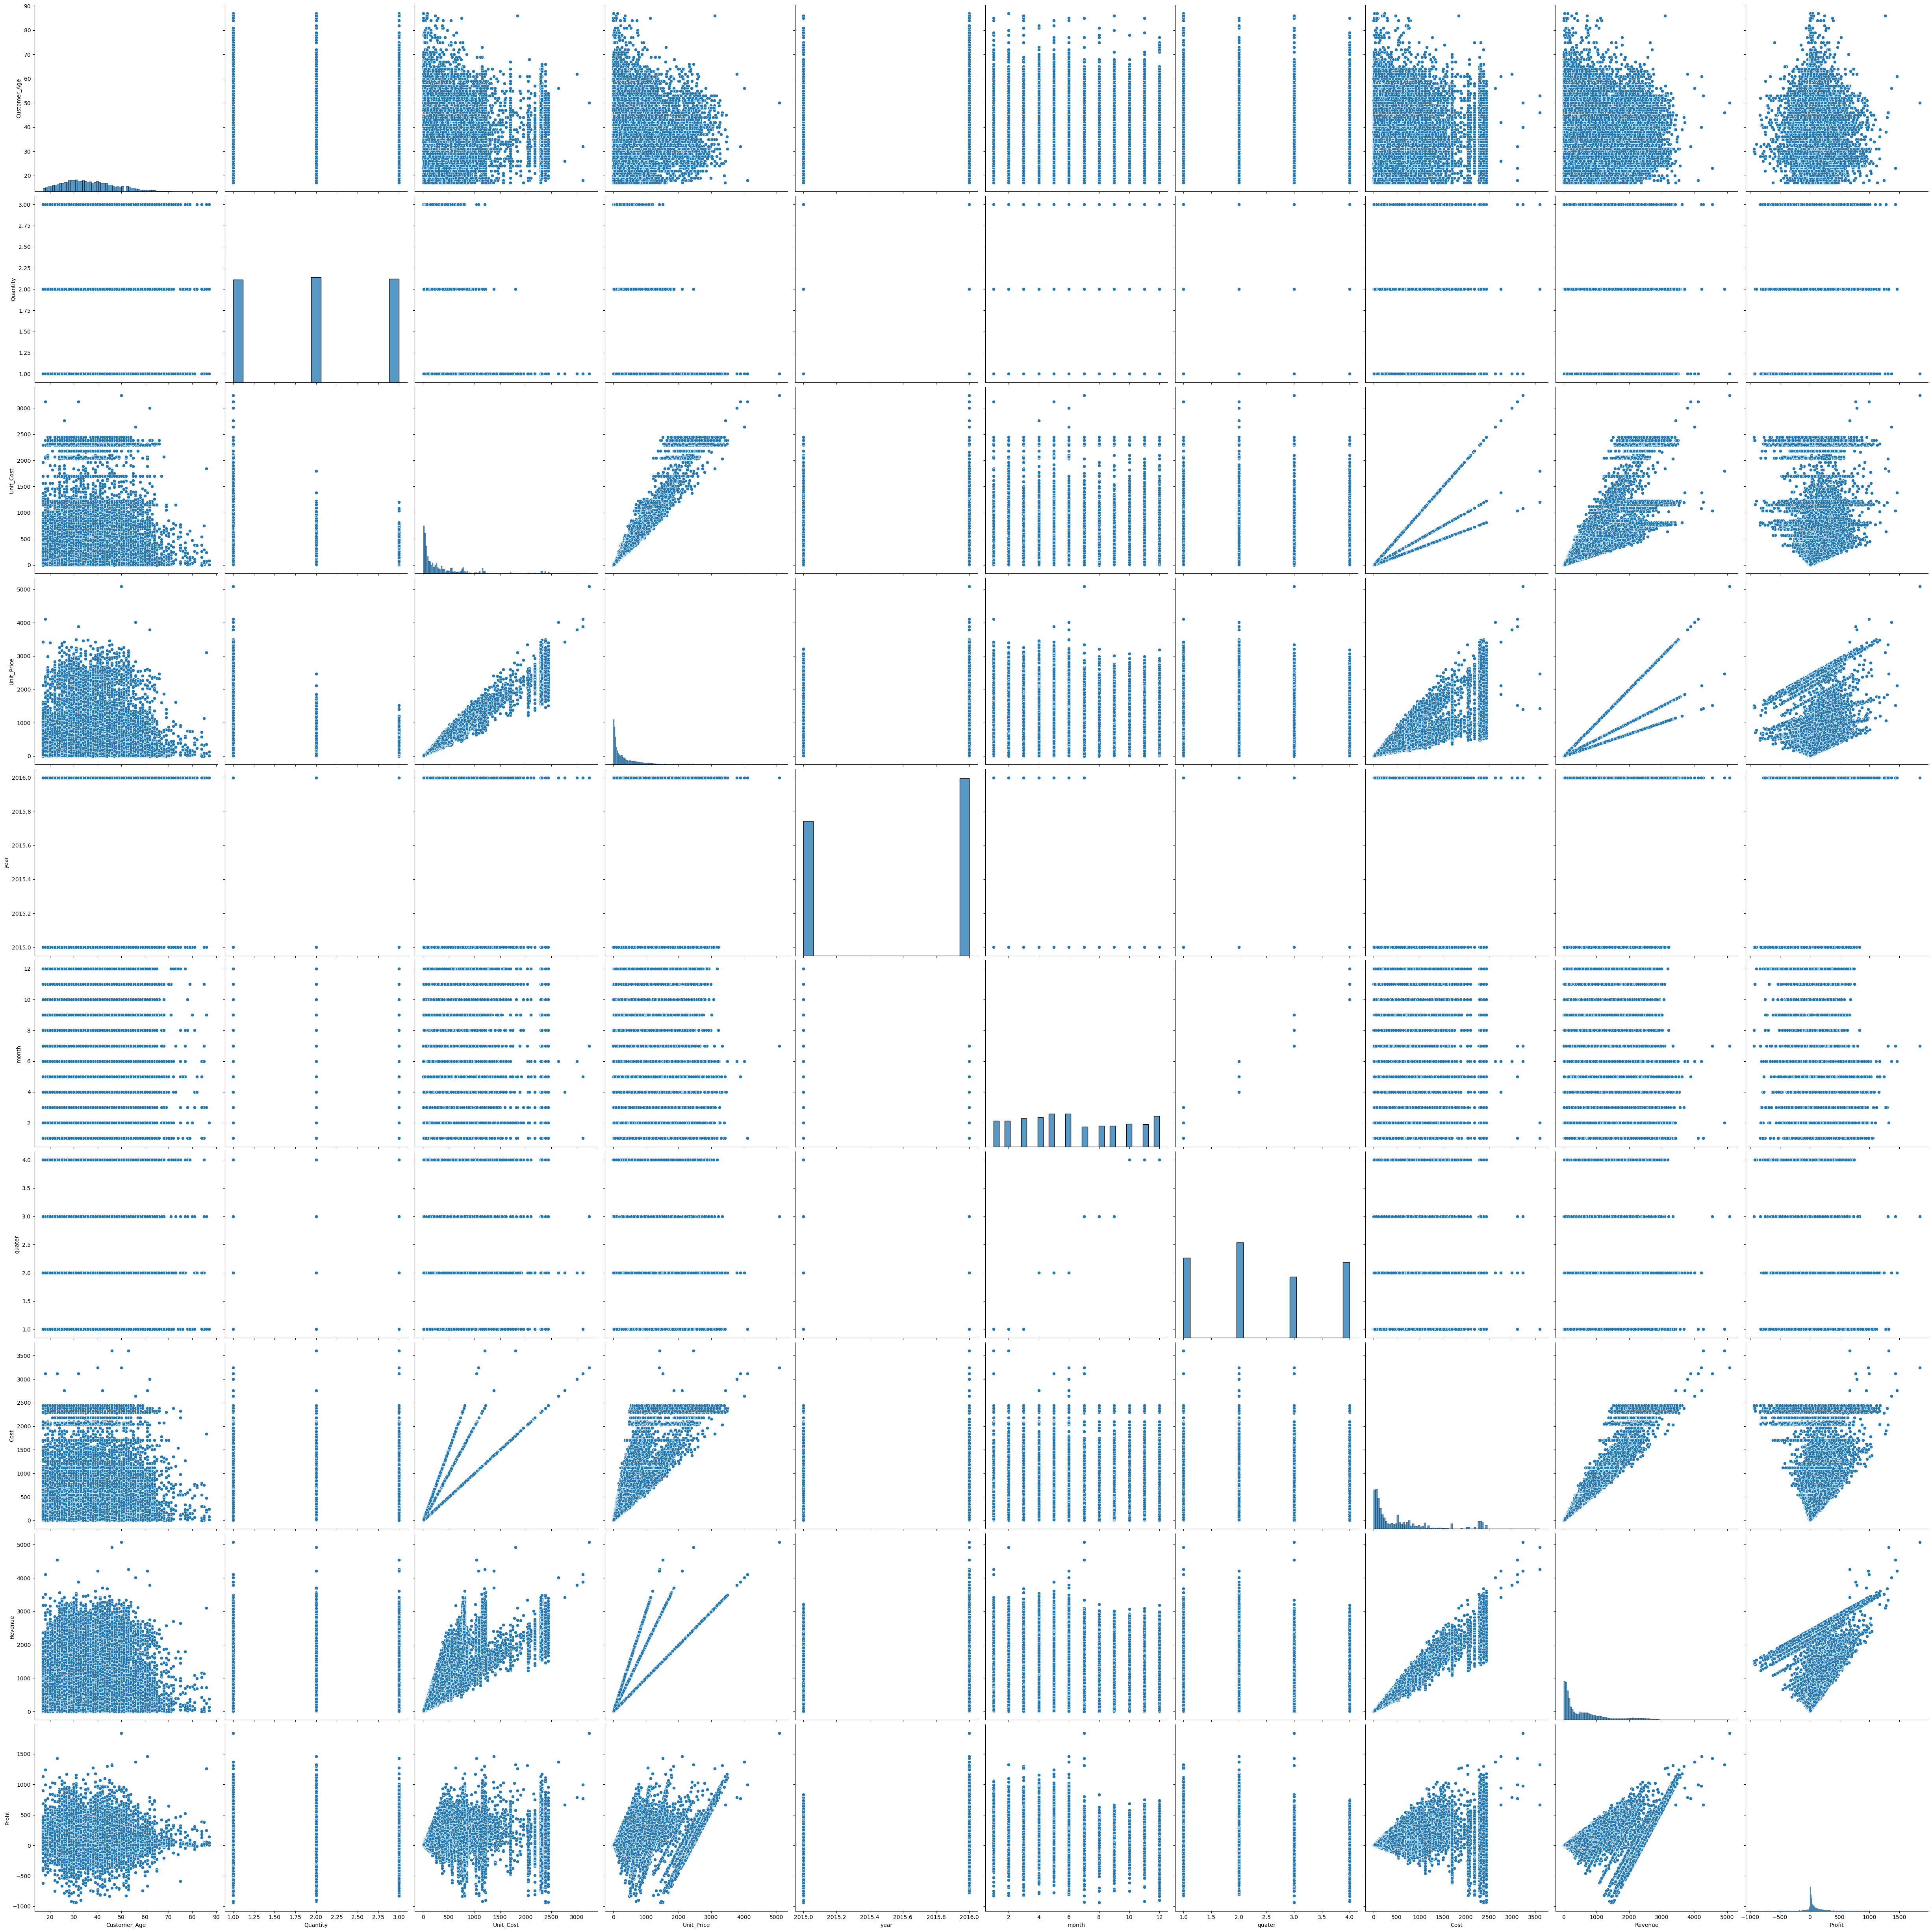

In [48]:
sns.pairplot(df, size=5);